### Preparación del entorno

He creado un entorno virtual nuevo para hacer el proyecto, comienzo a instalar todo lo que me puede hacer falta.

In [2]:
!pip install numpy pandas matplotlib pmdarima statsmodels scikit-learn


  Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached contourpy-1.2.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 3.0 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_10_9_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.2.0-cp311-cp311-macosx_10_10_x86_64.whl.metadata (9.7 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.12.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl (20.6 MB)
Using cached pandas-

In [3]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [4]:
!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 22.5 MB/s eta 0:00:0000:0100:01


In [29]:
!pip install scipy

### Importación de datos

In [6]:
import pandas as pd

train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

### Exploración inicial de los datos

In [8]:
# Verificar las primeras filas para tener una idea del contenido
print(train_df.head())

   id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
0              0.6              1               1       135  ...   40   75   
1              0.7              2               2       146  ...   57  126   
2              0.5              1               1       118  ...   45   93   
3              1.2              1               1       131  ...   38  102   
4              1.0              1               1       121  ...   44   93   

   hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
0        16.5              1               1.0   22   25   2

In [9]:
# Resumen de los datos
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [10]:
# Estadísticas descriptivas
print(train_df.describe())

                  id            age     height(cm)     weight(kg)  \
count  159256.000000  159256.000000  159256.000000  159256.000000   
mean    79627.500000      44.306626     165.266929      67.143662   
std     45973.391572      11.842286       8.818970      12.586198   
min         0.000000      20.000000     135.000000      30.000000   
25%     39813.750000      40.000000     160.000000      60.000000   
50%     79627.500000      40.000000     165.000000      65.000000   
75%    119441.250000      55.000000     170.000000      75.000000   
max    159255.000000      85.000000     190.000000     130.000000   

           waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  \
count  159256.000000   159256.000000    159256.000000  159256.000000   
mean       83.001990        1.005798         1.000989       1.023974   
std         8.957937        0.402113         0.392299       0.152969   
min        51.000000        0.100000         0.100000       1.000000   
25%        77.0000

In [11]:
# Contar valores faltantes por columna
print(train_df.isnull().sum())

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


In [12]:
# Conteo de valores únicos
print(train_df.nunique())

id                     159256
age                        18
height(cm)                 14
weight(kg)                 28
waist(cm)                 531
eyesight(left)             20
eyesight(right)            17
hearing(left)               2
hearing(right)              2
systolic                  112
relaxation                 75
fasting blood sugar       229
Cholesterol               227
triglyceride              392
HDL                       108
LDL                       222
hemoglobin                134
Urine protein               6
serum creatinine           28
AST                       140
ALT                       188
Gtp                       362
dental caries               2
smoking                     2
dtype: int64


### Visualización preliminar

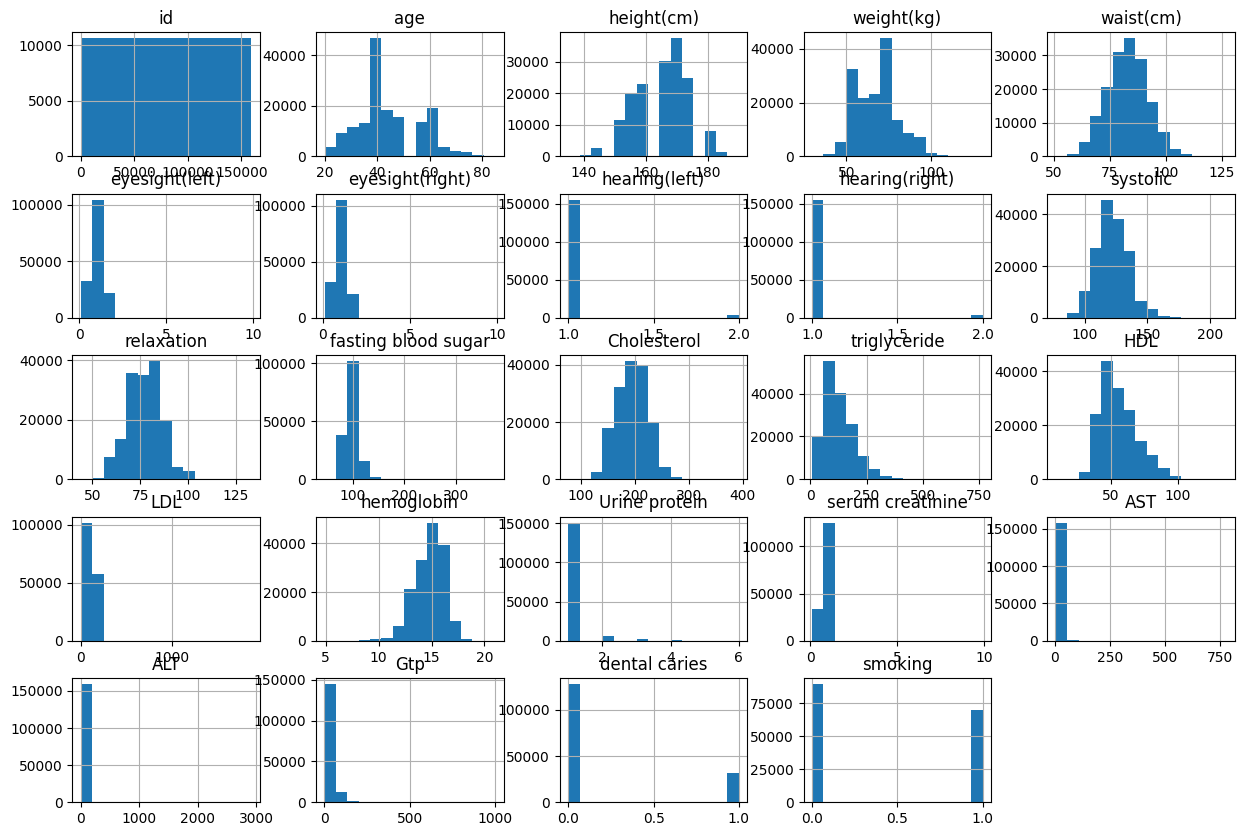

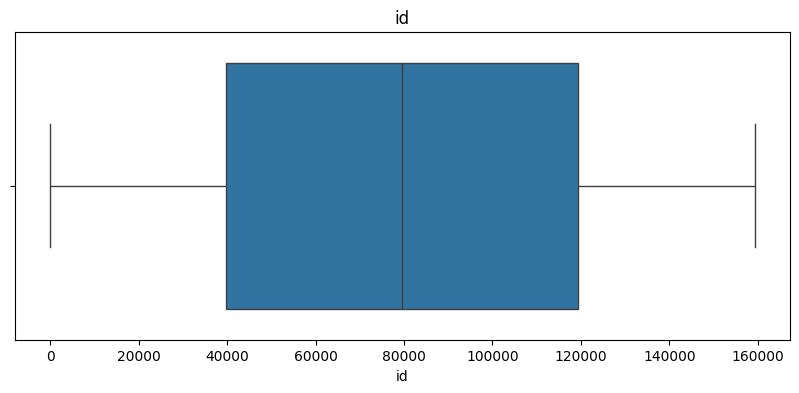

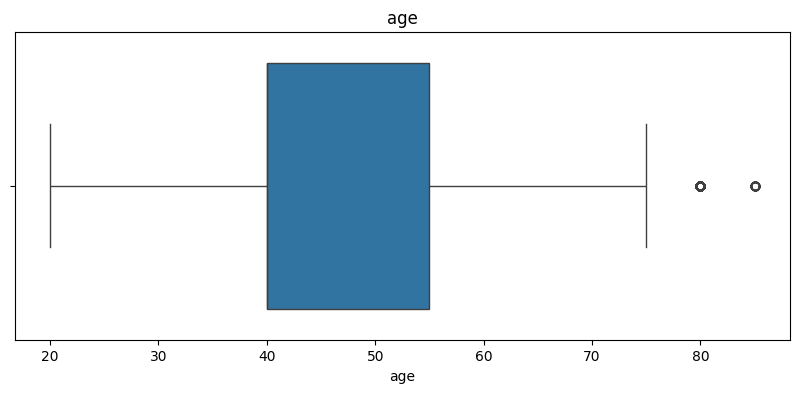

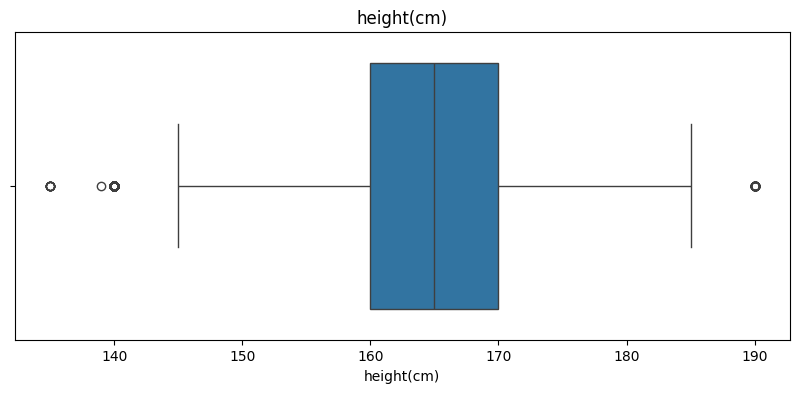

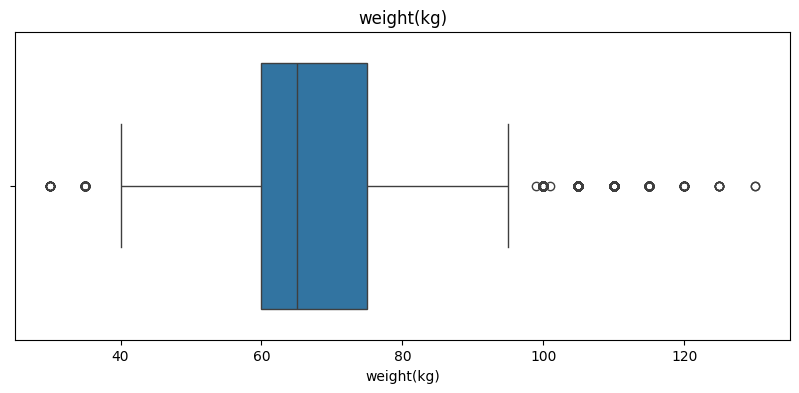

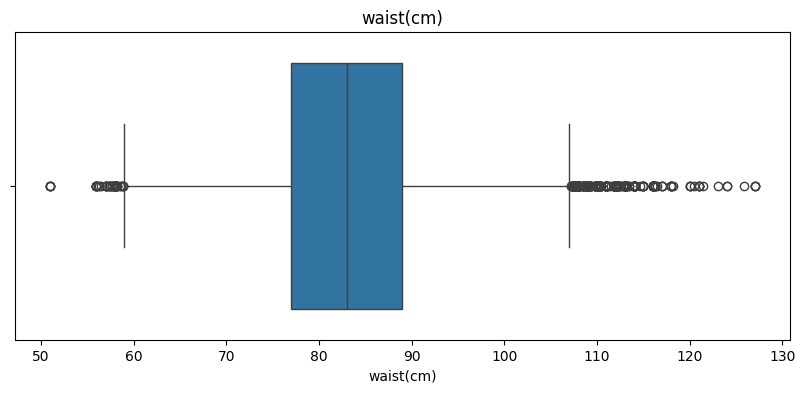

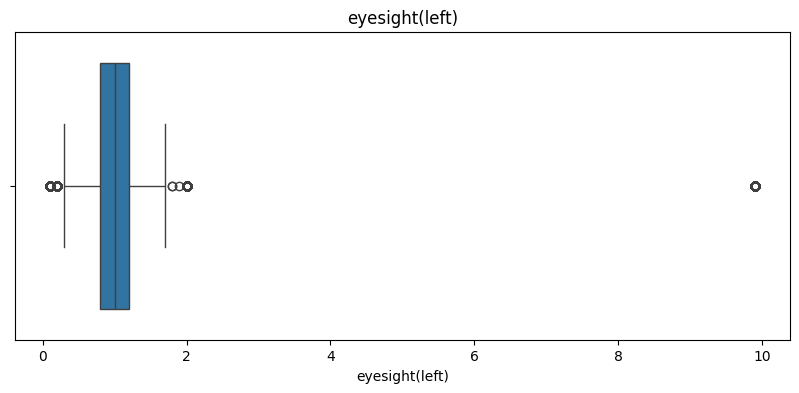

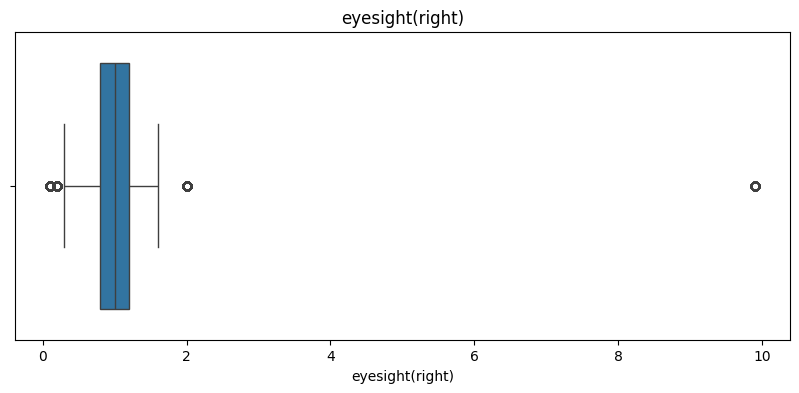

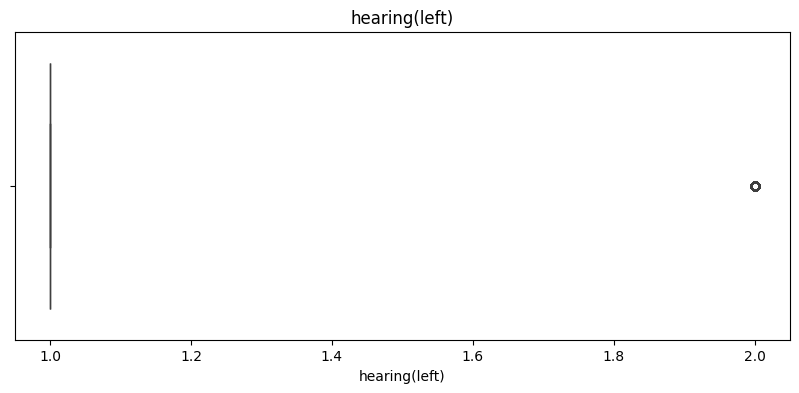

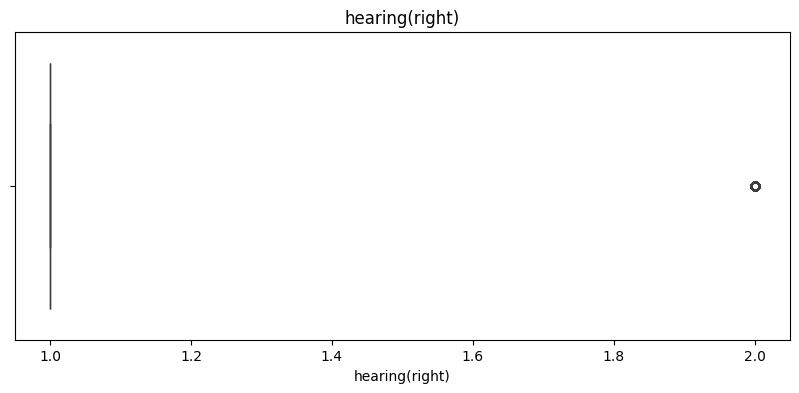

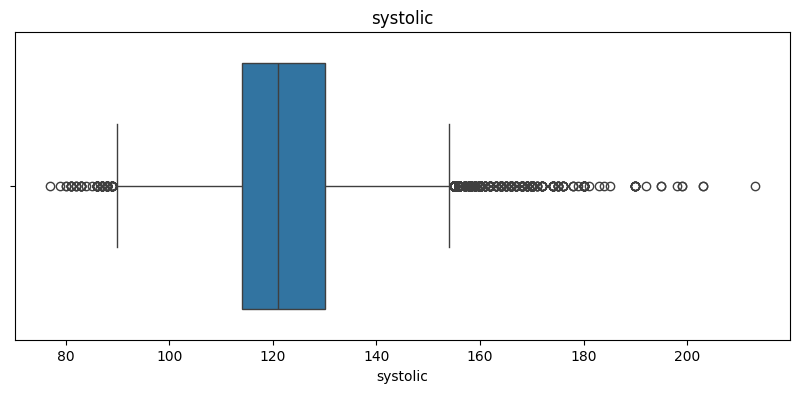

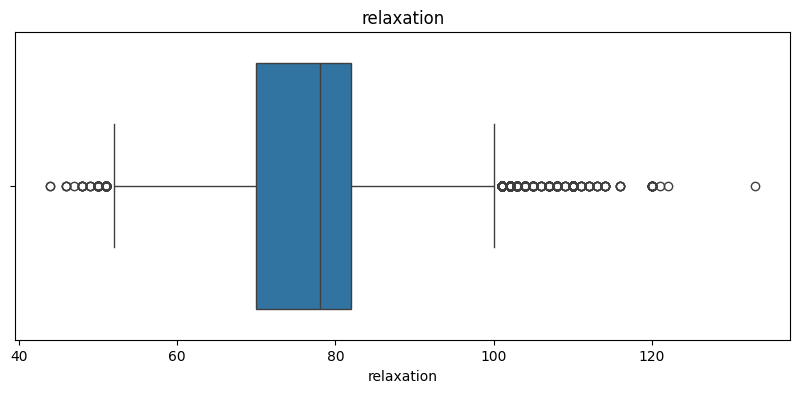

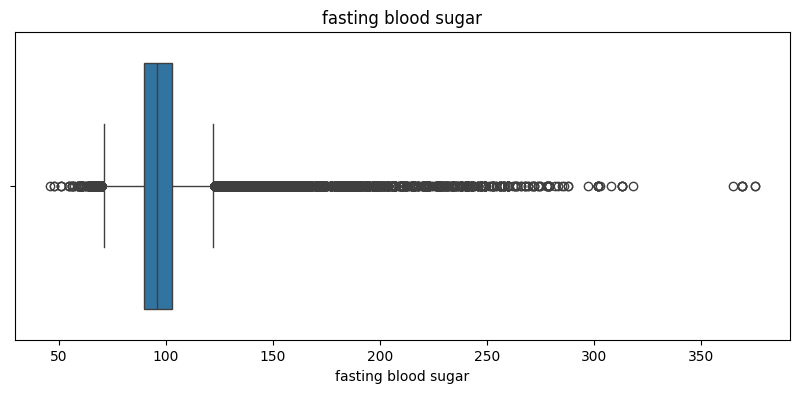

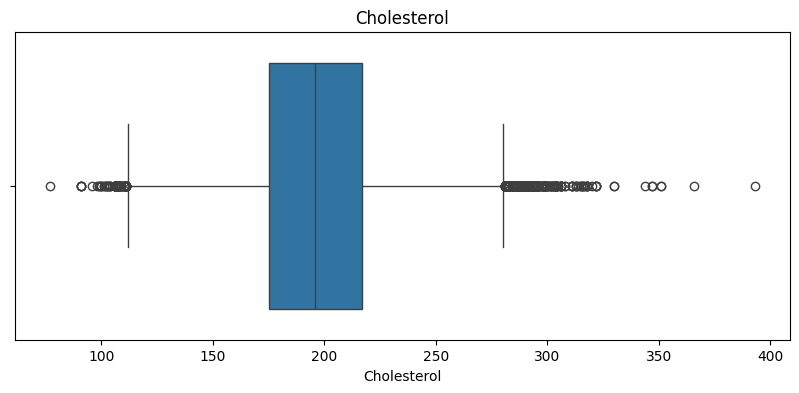

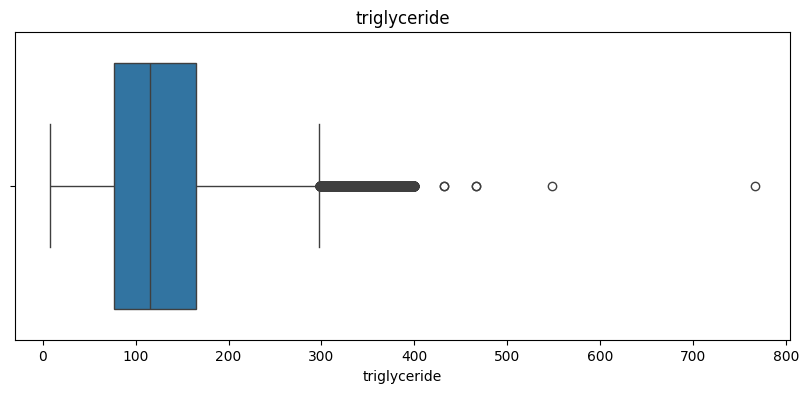

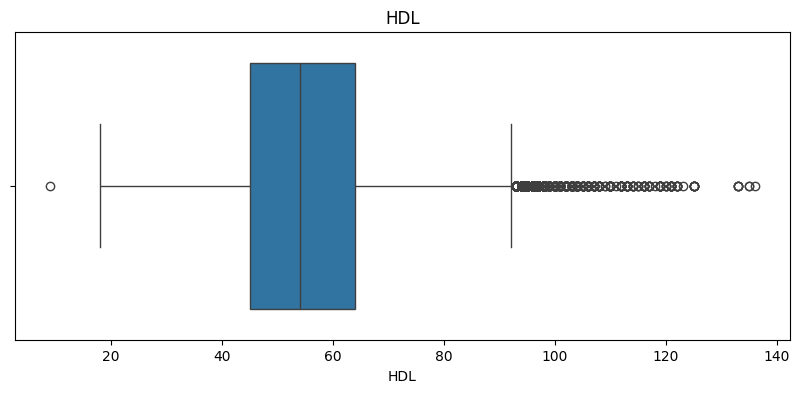

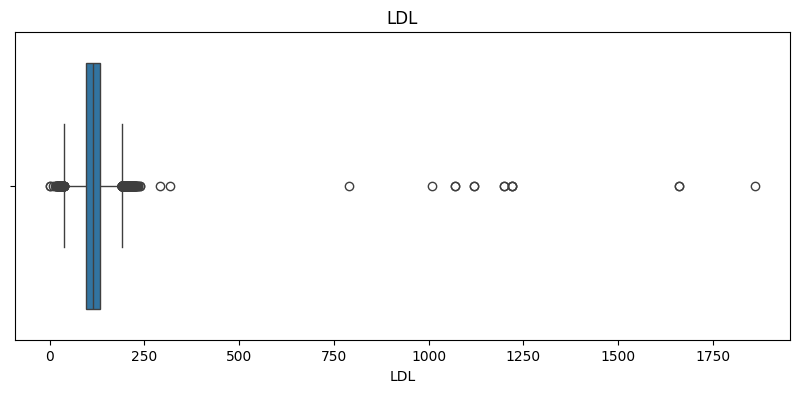

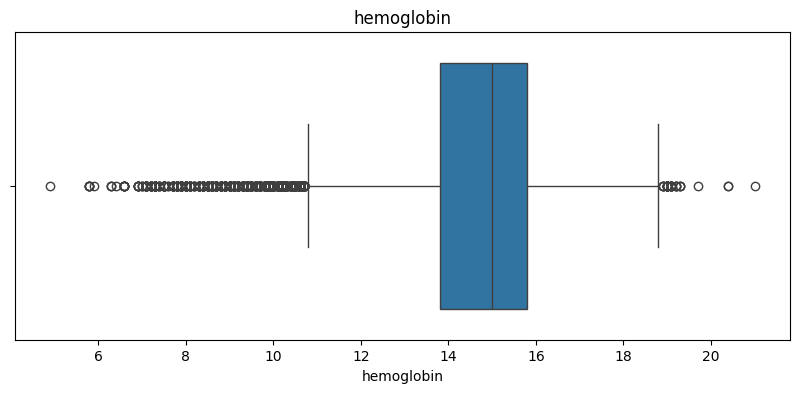

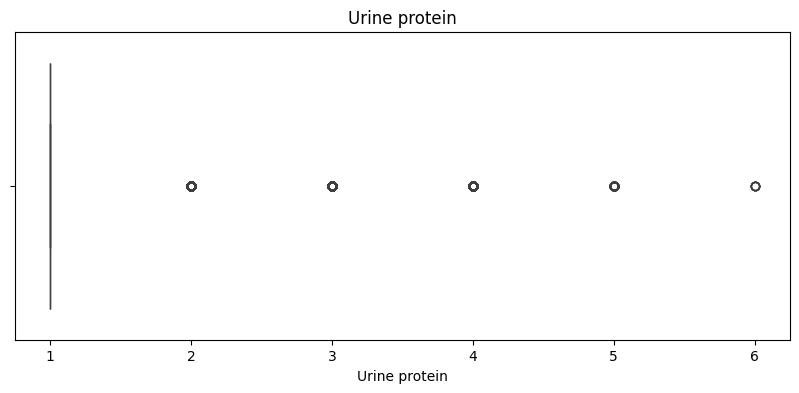

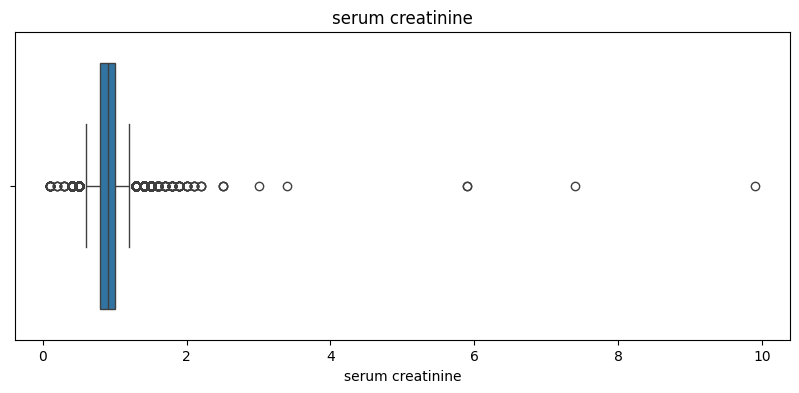

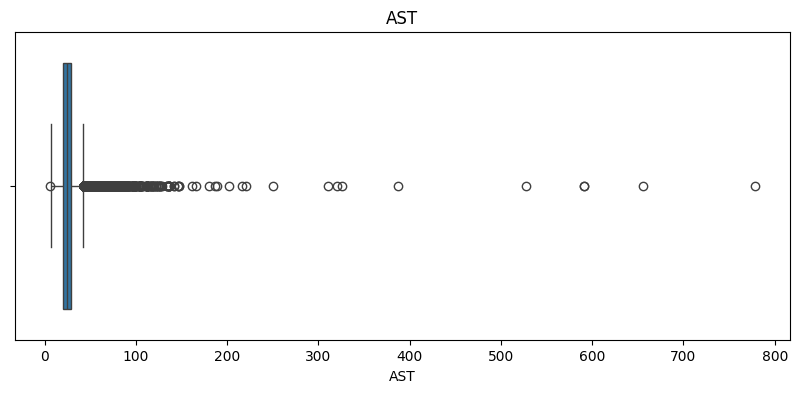

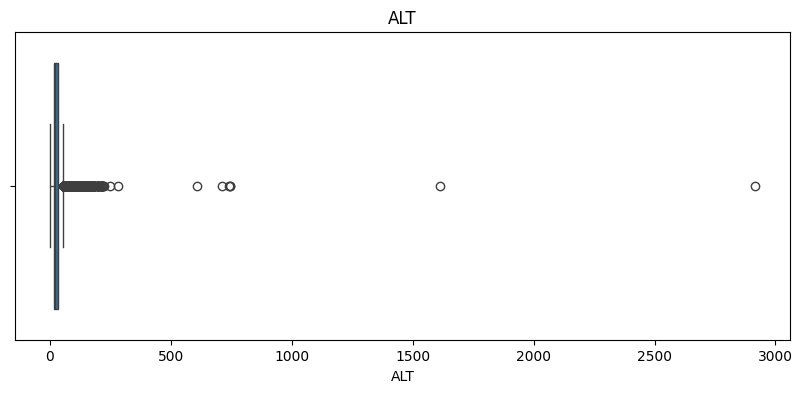

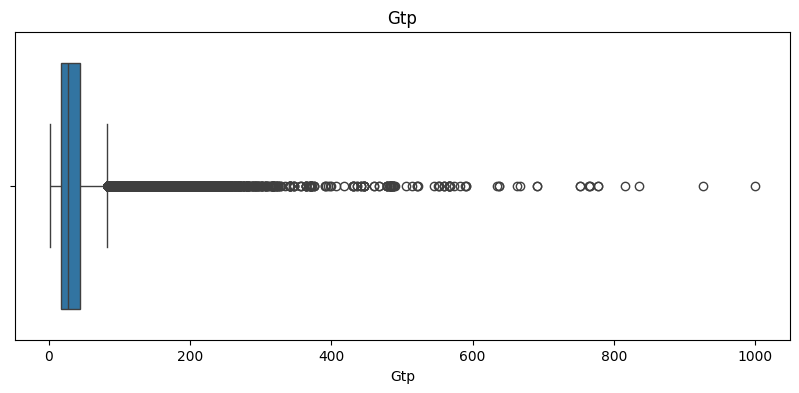

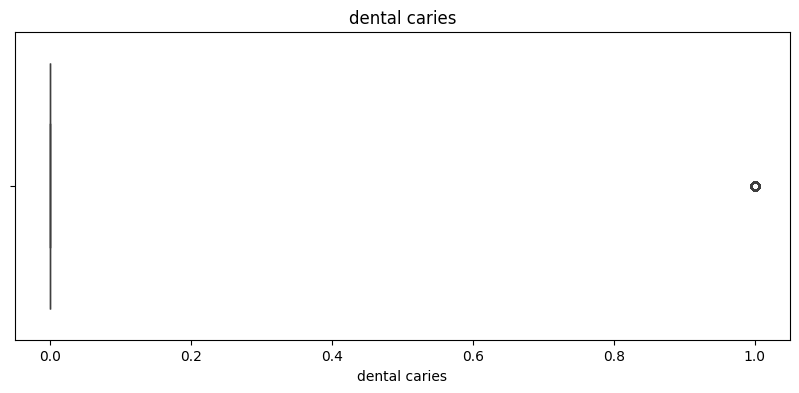

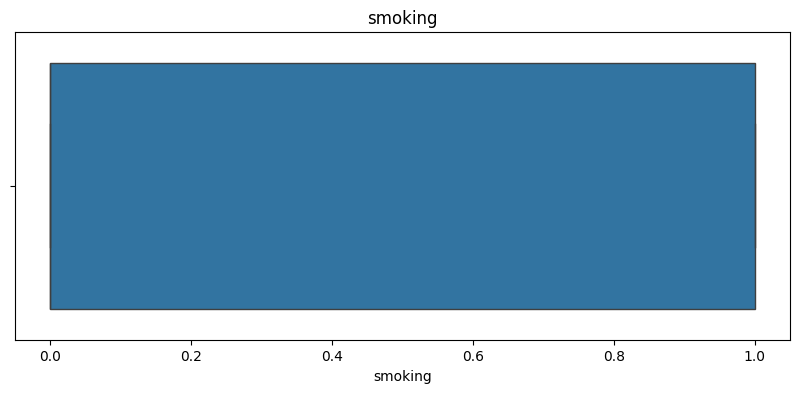

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para variables numéricas
train_df.hist(bins=15, figsize=(15, 10))
plt.show()

# Boxplots para entender la distribución y buscar outliers
for column in train_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=train_df[column])
    plt.title(column)
    plt.show()

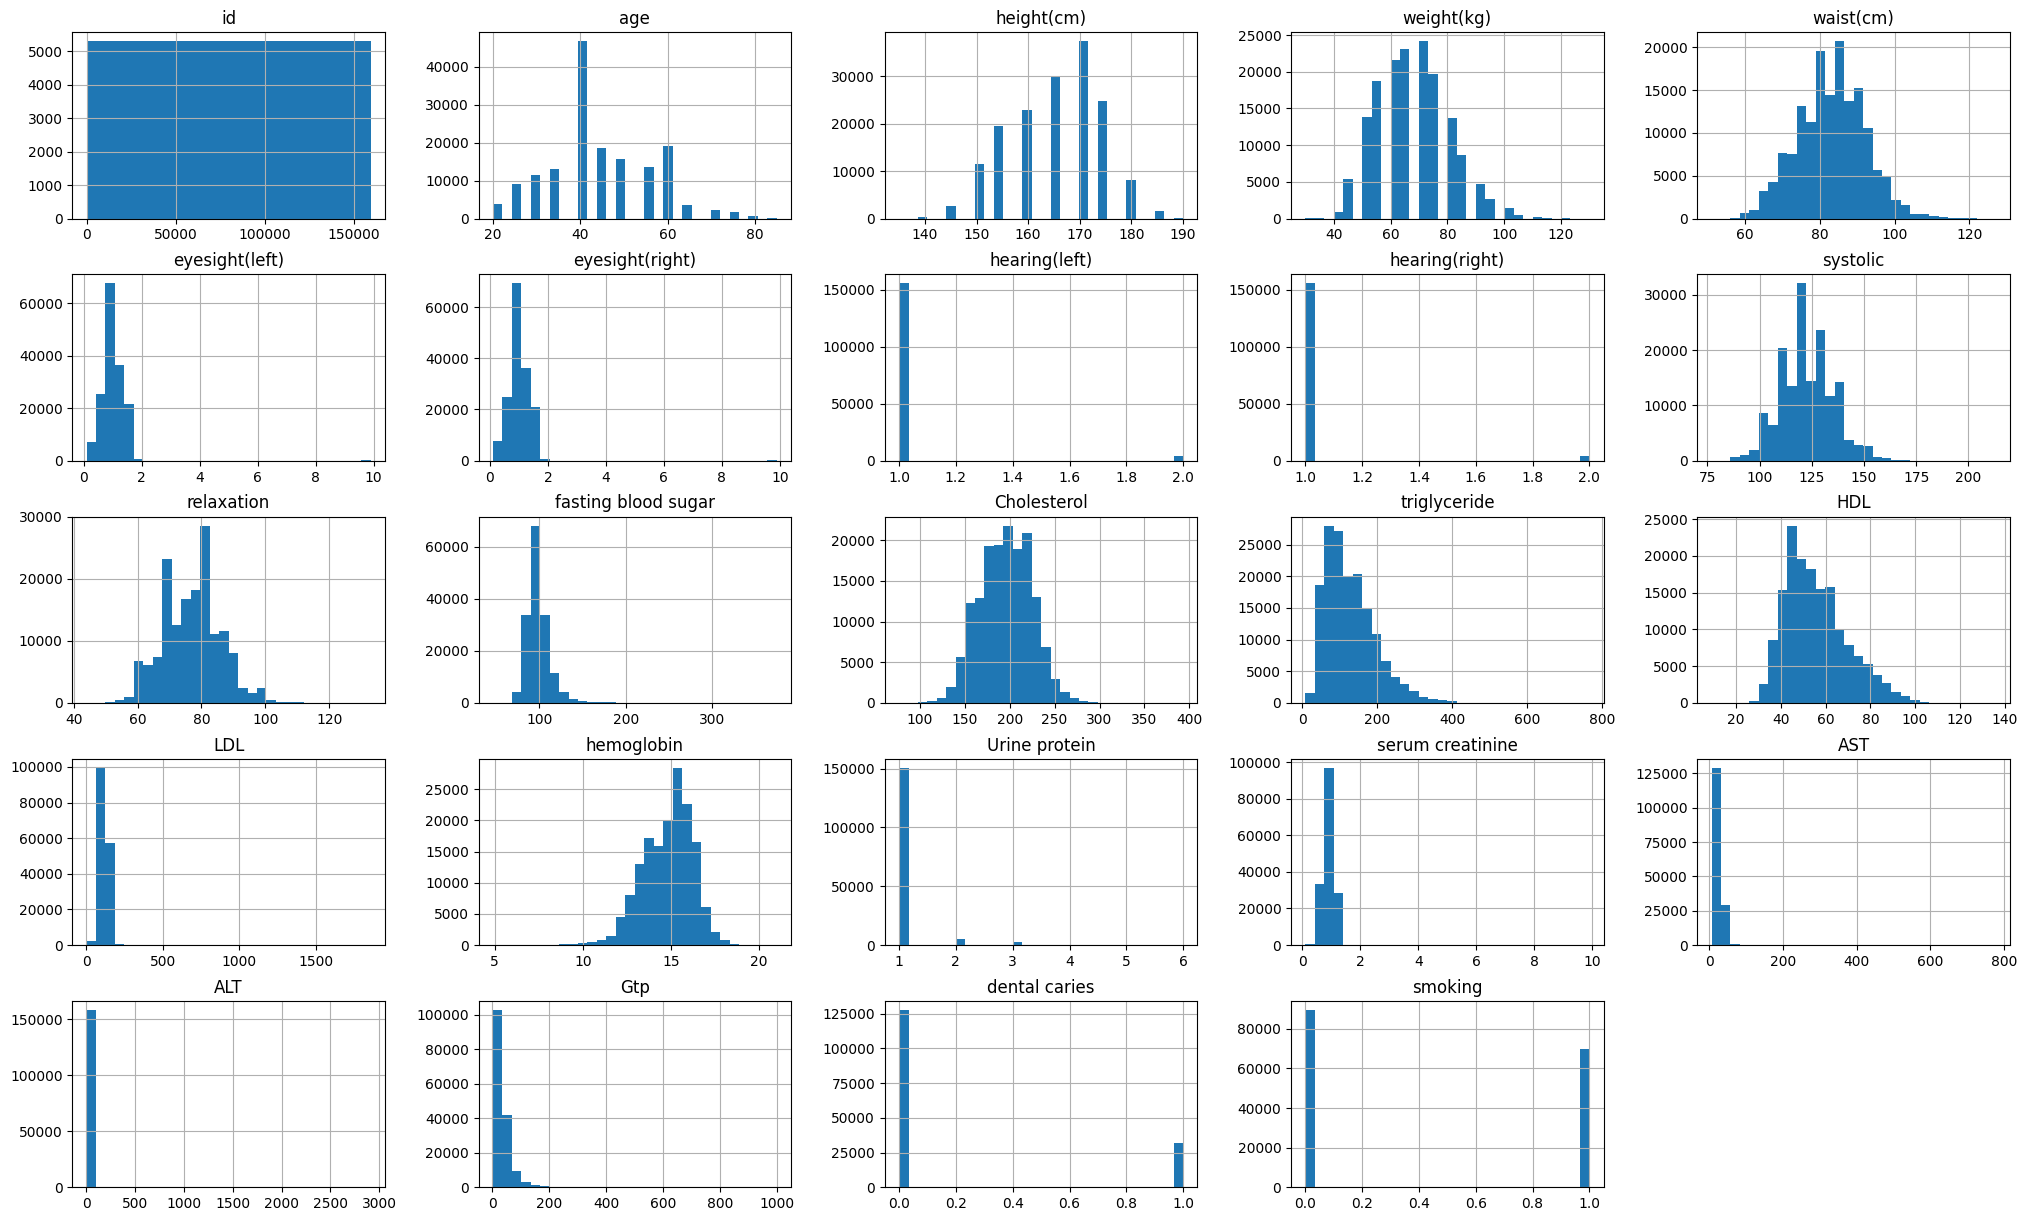

In [17]:
train_df.hist(bins=30, figsize=(25, 15))
plt.show()

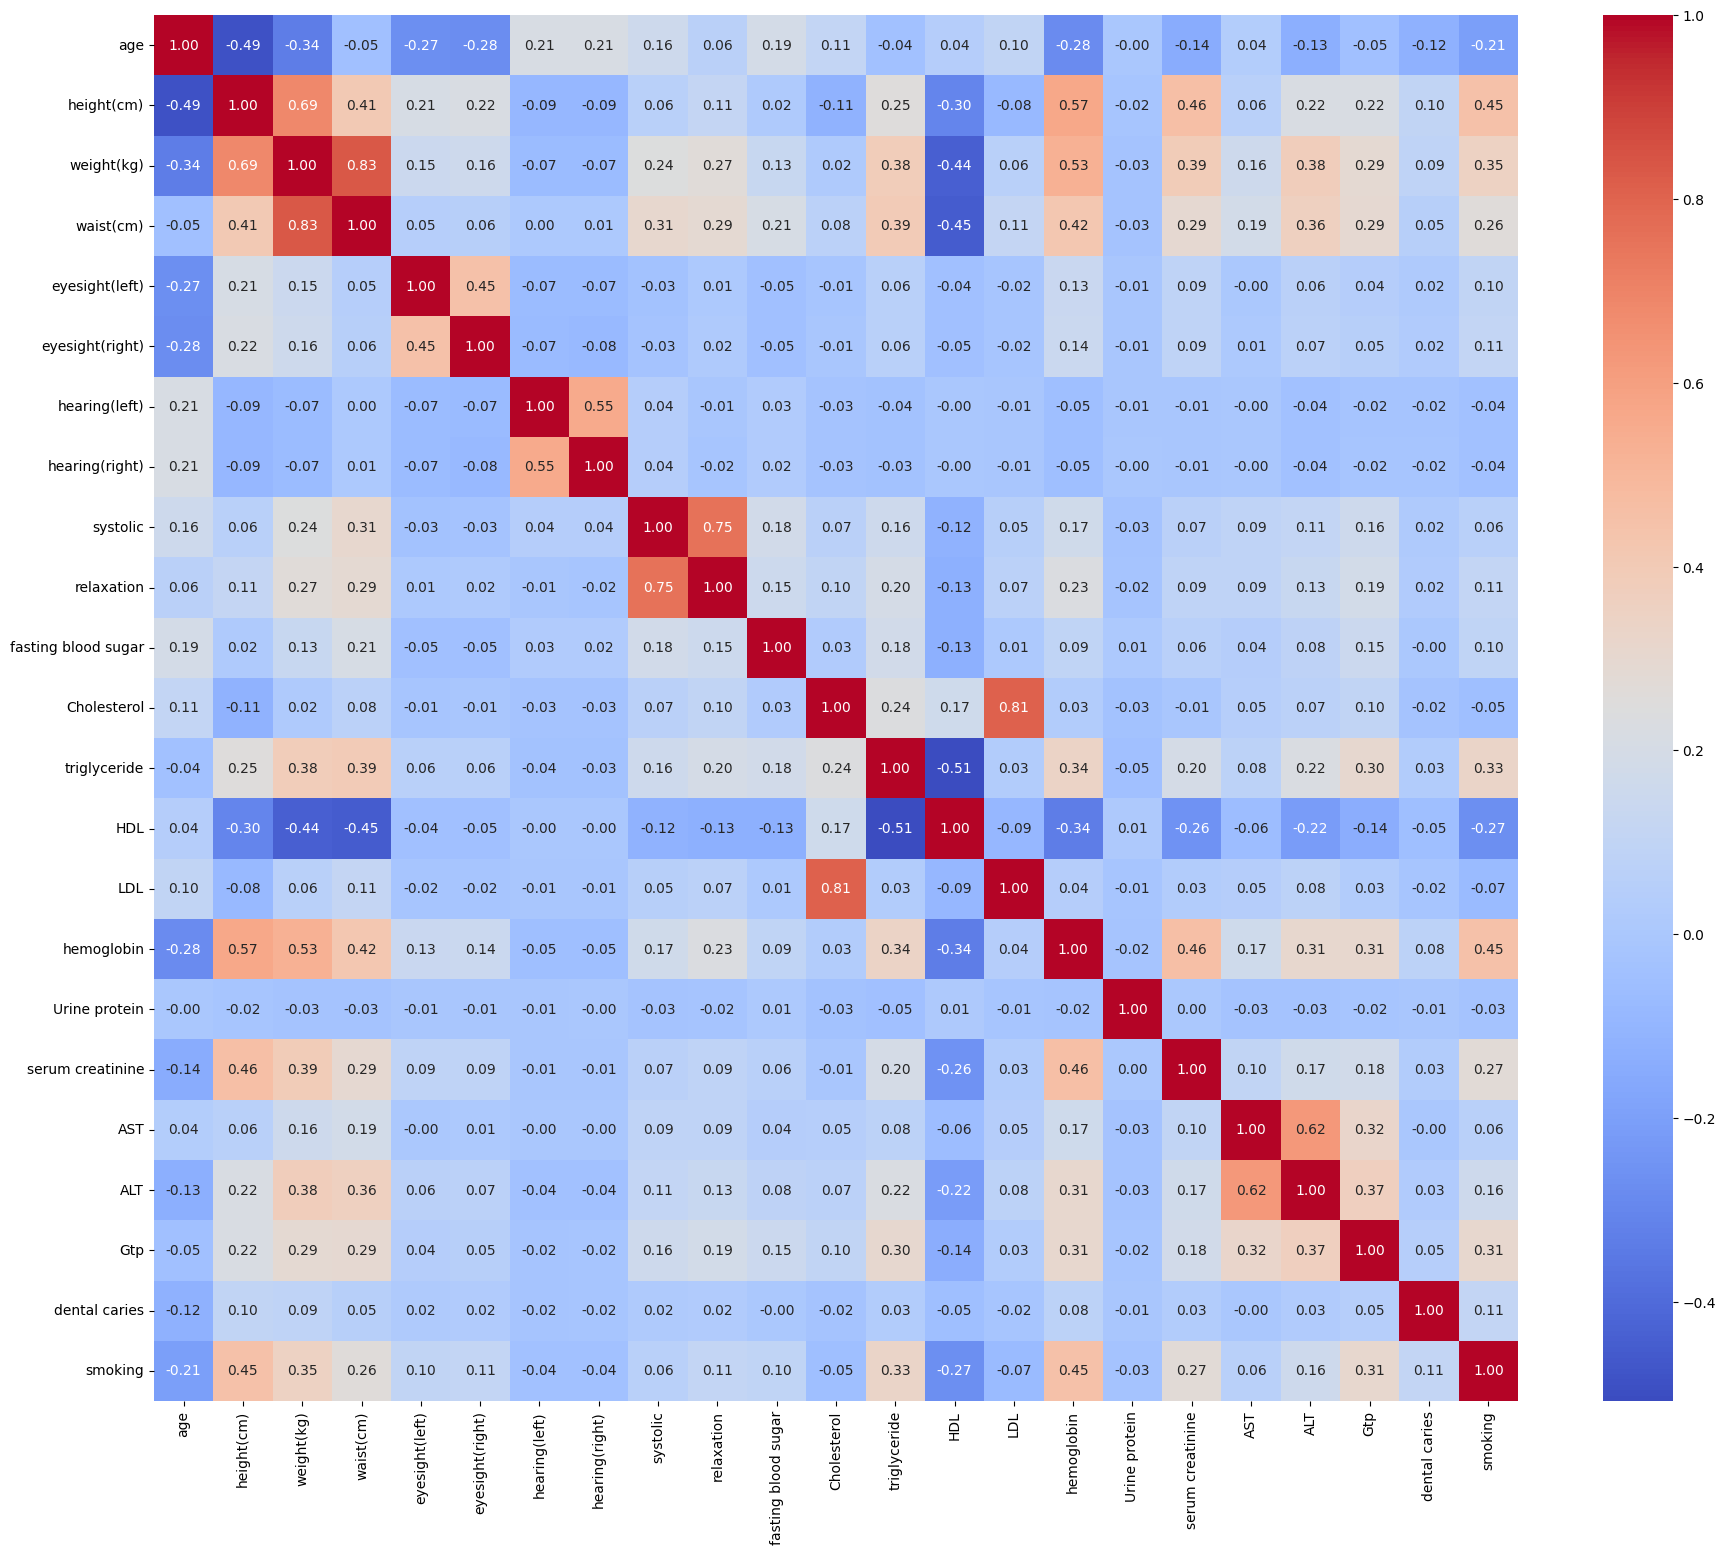

In [18]:
# Elimino el ID, porque no aporta nada y hago el mapa de correlaciones
train_df = train_df.drop('id', axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

corr = train_df.corr()
plt.figure(figsize=(22,18))  
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

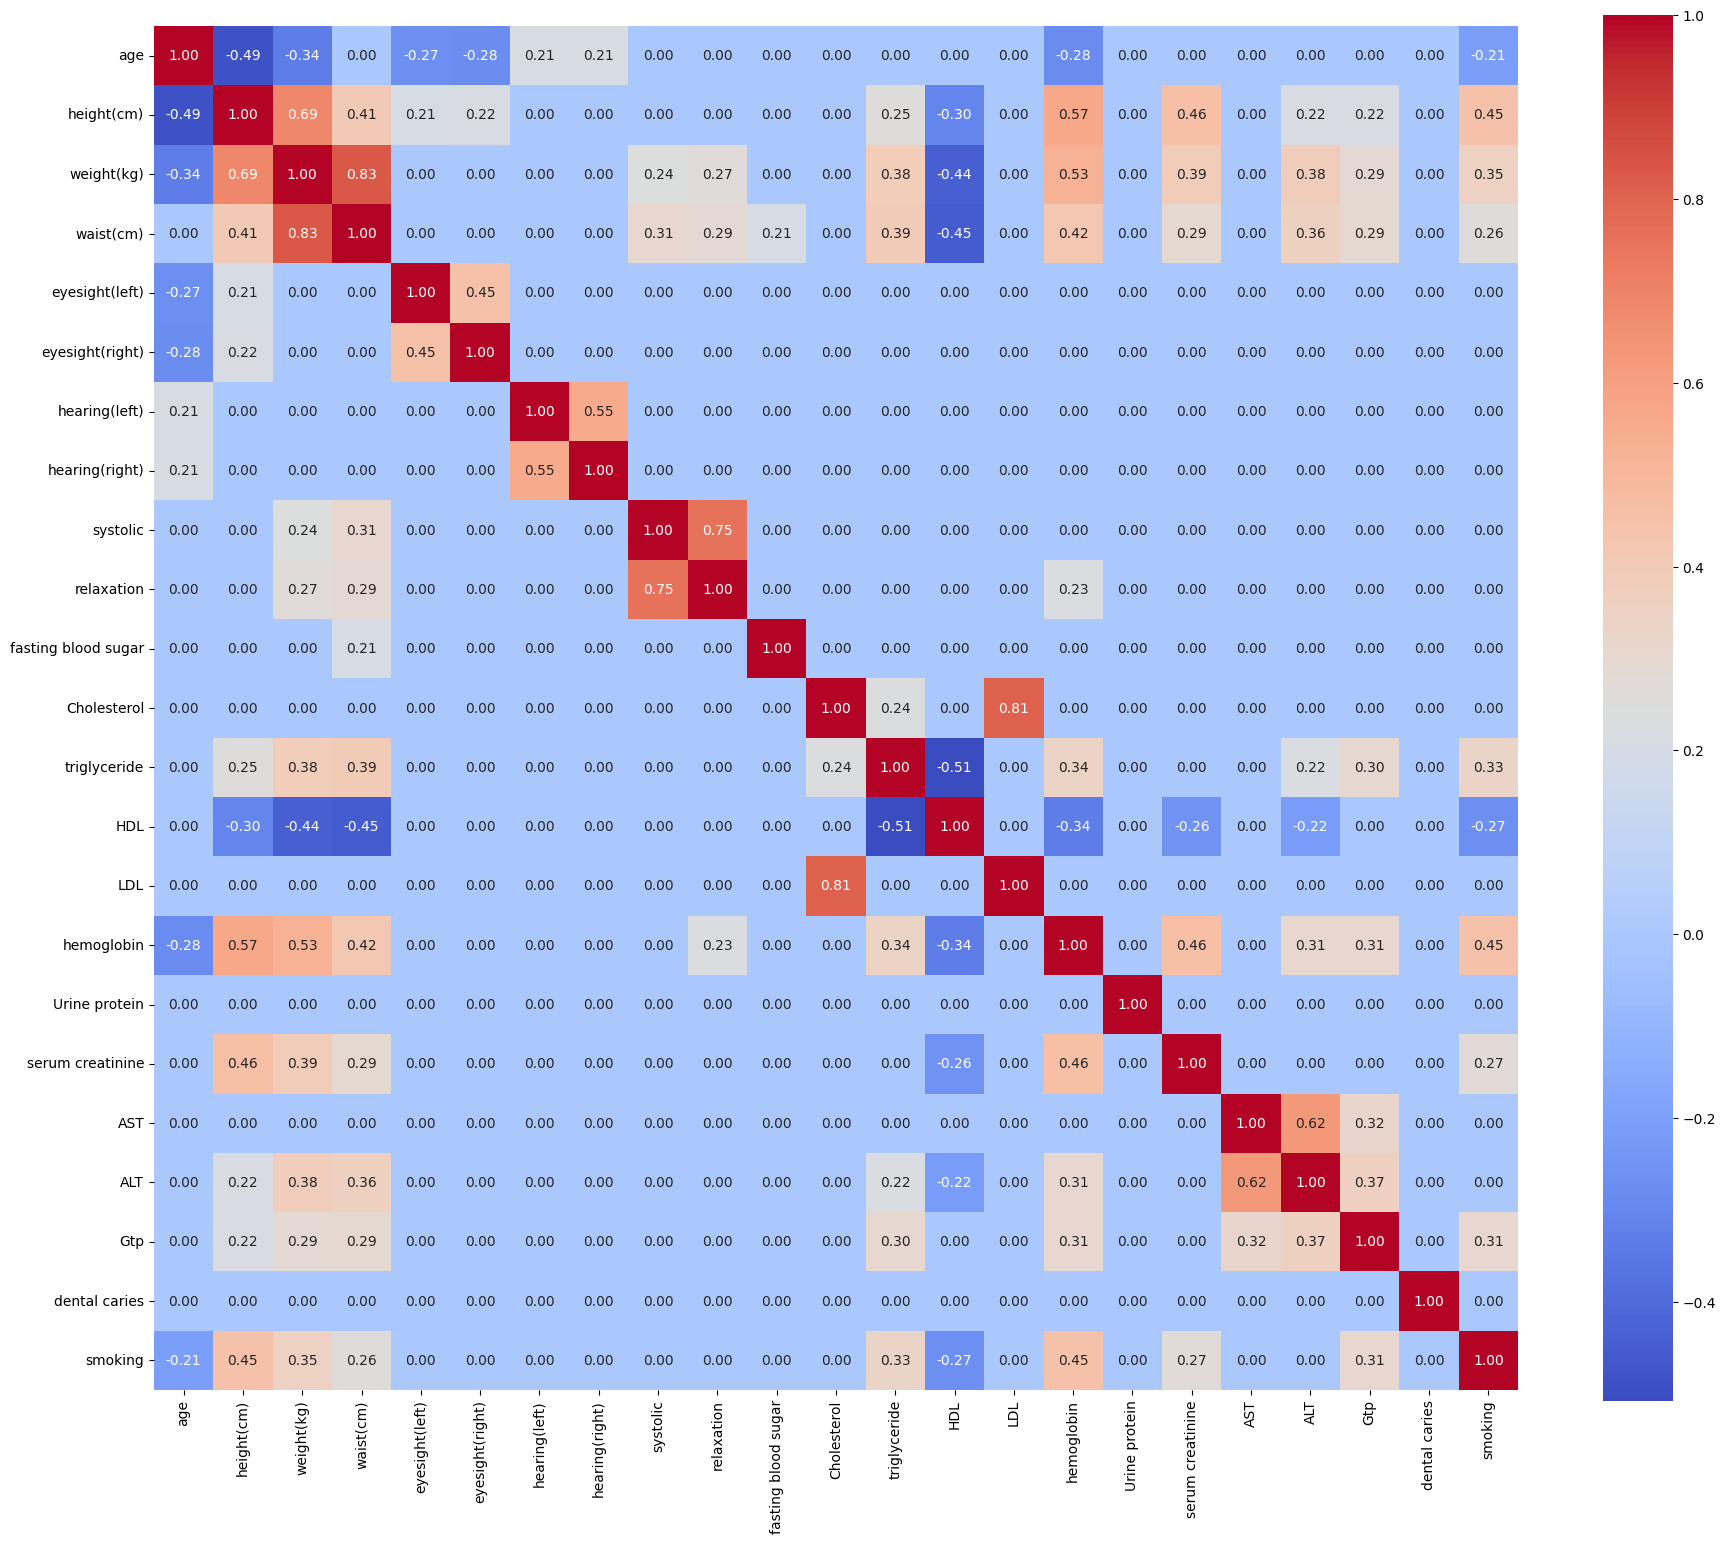

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_df.corr()

# Establece a cero las correlaciones menores que el valor absoluto de 0.2 para verlo mejor
corr[corr.abs() < 0.2] = 0

plt.figure(figsize=(22, 18))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.show()

In [23]:
train_df.to_csv('../data/processed/train_processed.csv', index=False)

In [24]:
train_df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,...,55,80,14.4,1,1.1,22,17,37,0,1


In [33]:
df = pd.read_csv('../data/processed/train_processed.csv')
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers_z = (z_scores > 3).any(axis=1)
df_clean_z = df[~outliers_z]
df_clean_z.to_csv('../data/processed/train_processed_no_outliers_z.csv', index=False)


In [34]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean_iqr = df[~outliers_iqr]

In [36]:
df_clean_z.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.0,138875.0,138875.000000,138875.000000,...,138875.000000,138875.000000,138875.000000,138875.000000,138875.00000,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000
mean,43.633289,165.406121,66.941825,82.667135,1.007888,1.003472,1.0,1.0,122.037941,76.651003,...,55.892536,114.872418,14.823623,1.037501,0.89152,24.792698,25.420731,33.171190,0.198949,0.434326
std,11.412699,8.758014,12.108342,8.678588,0.307364,0.306957,0.0,0.0,12.423009,8.822003,...,13.689859,25.696337,1.344639,0.189988,0.17229,7.114513,12.572411,20.962736,0.399211,0.495670
min,20.000000,139.000000,30.000000,56.200000,0.100000,0.100000,1.0,1.0,85.000000,50.000000,...,22.000000,32.000000,10.600000,1.000000,0.40000,7.000000,1.000000,3.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.0,1.0,113.000000,70.000000,...,46.000000,95.000000,13.800000,1.000000,0.80000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.0,1.0,120.000000,78.000000,...,54.000000,115.000000,15.000000,1.000000,0.90000,23.000000,22.000000,27.000000,0.000000,0.000000
75%,50.000000,170.000000,75.000000,88.800000,1.200000,1.200000,1.0,1.0,130.000000,82.000000,...,64.000000,134.000000,15.800000,1.000000,1.00000,29.000000,31.000000,42.000000,0.000000,1.000000
max,75.000000,190.000000,101.000000,109.800000,2.000000,2.000000,1.0,1.0,160.000000,103.000000,...,97.000000,199.000000,19.000000,2.000000,1.40000,53.000000,79.000000,129.000000,1.000000,1.000000


In [37]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


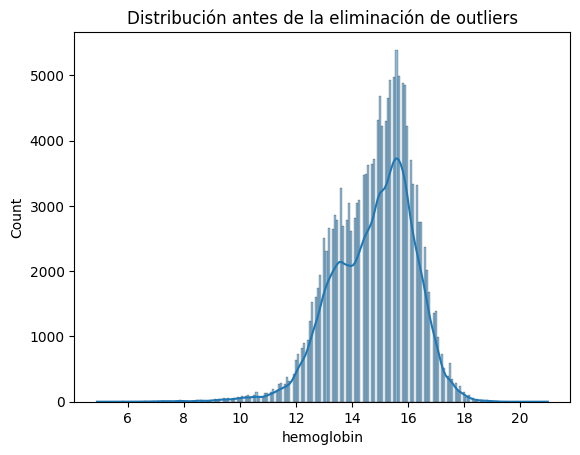

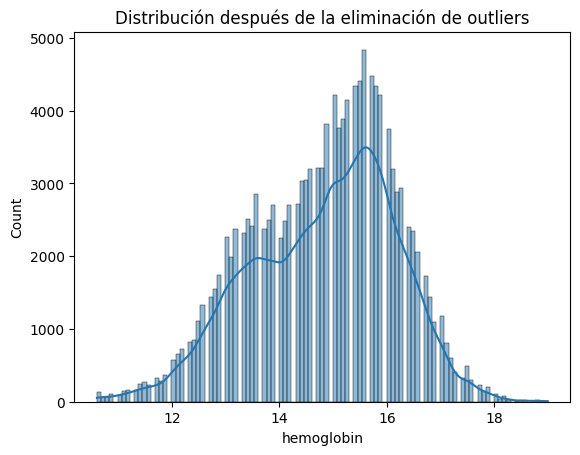

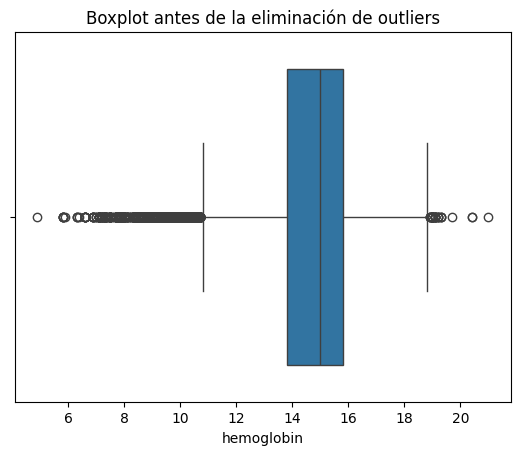

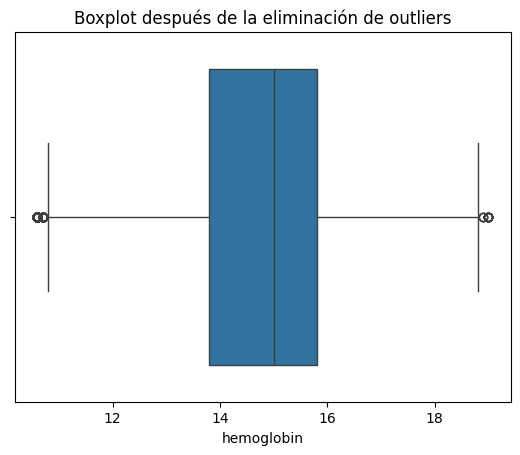

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma antes de la eliminación de outliers
sns.histplot(df['hemoglobin'], kde=True)
plt.title('Distribución antes de la eliminación de outliers')
plt.show()

# Histograma después de la eliminación de outliers
sns.histplot(df_clean_z['hemoglobin'], kde=True)
plt.title('Distribución después de la eliminación de outliers')
plt.show()

# Boxplot antes de la eliminación de outliers
sns.boxplot(x=df['hemoglobin'])
plt.title('Boxplot antes de la eliminación de outliers')
plt.show()

# Boxplot después de la eliminación de outliers
sns.boxplot(x=df_clean_z['hemoglobin'])
plt.title('Boxplot después de la eliminación de outliers')
plt.show()


In [40]:
print("Número de filas antes de la eliminación:", len(df))
print("Número de filas después de la eliminación:", len(df_clean_z))


Número de filas antes de la eliminación: 159256
Número de filas después de la eliminación: 138875


In [43]:
df = df_clean_z